In [175]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

#1. Logistic Binary Classification

In [176]:
np.random.seed(0)
train_x = 5*(2*np.random.random_sample(size=(100,1)) - 1)
noise = 2*np.random.random_sample(size=(100,1)) -1

train_y = np.where(1/(np.exp(-train_x + noise) + 1) >= 0.5, 1, 0)#.reshape(-1,)

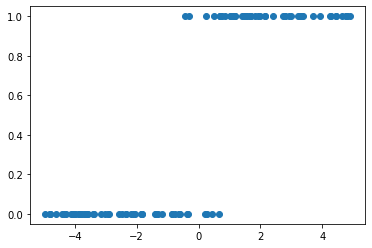

In [177]:
plt.scatter(train_x, train_y)

In [178]:
# hyper-parameters
input_size = 1
output_size = 1

num_epochs = 300
learning_rate = 0.05

In [179]:
# Build Model
model = nn.Sequential(
                      nn.Linear(input_size, output_size),
                      nn.Sigmoid()
                     )

In [180]:
# Loss and Optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [181]:
# Train the Model
for epoch in range(1, num_epochs+1):
    input = torch.Tensor(train_x)
    target = torch.Tensor(train_y)

    # Forward pass
    output = model(input)
    loss = criterion(output, target)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch%20 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Loss : {loss.item():.4f}')

Epoch [20/300], Loss : 0.3074
Epoch [40/300], Loss : 0.2226
Epoch [60/300], Loss : 0.1921
Epoch [80/300], Loss : 0.1756
Epoch [100/300], Loss : 0.1649
Epoch [120/300], Loss : 0.1574
Epoch [140/300], Loss : 0.1517
Epoch [160/300], Loss : 0.1472
Epoch [180/300], Loss : 0.1436
Epoch [200/300], Loss : 0.1406
Epoch [220/300], Loss : 0.1381
Epoch [240/300], Loss : 0.1359
Epoch [260/300], Loss : 0.1340
Epoch [280/300], Loss : 0.1323
Epoch [300/300], Loss : 0.1309


In [182]:
model[0].bias

Parameter containing:
tensor([0.0138], requires_grad=True)

In [183]:
model[0].weight

Parameter containing:
tensor([[1.7577]], requires_grad=True)

In [185]:
test_x = 5*(np.random.random_sample(size=(5,1))*2 - 1)
test_x

array([[-4.32750369],
       [ 1.79392773],
       [-0.46303155],
       [ 0.36579211],
       [ 3.96671293]])

In [186]:
pred = model(torch.Tensor(test_x))
torch.round(pred)

tensor([[0.],
        [1.],
        [0.],
        [1.],
        [1.]], grad_fn=<RoundBackward0>)

#2. Logistic Multilabel Classification with MNIST

In [200]:
BATCH_SIZE = 32

In [207]:
# MNINST Dataset
train_dataset = torchvision.datasets.MNIST(root='../../data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)
test_dataset = torchvision.datasets.MNIST(root='../../data',
                                          train=False,
                                          transform=transforms.ToTensor(),
                                          download=True)

In [208]:
# Data Loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=BATCH_SIZE,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=BATCH_SIZE,
                                          shuffle=False)

In [209]:
# hyper-parameters
input_size = 28*28
num_classes = 10

num_epochs = 5
learning_rate = 5e-3

In [210]:
# Build Model
model = nn.Linear(input_size, num_classes)

In [211]:
# Loss and Optimizer
# 주의! : nn.CrossEntropyLoss()는 내부에서 softmax 계산을 하기때문에 모델에 softmax를 달아놓으면 안됩니다.
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [212]:
# Train the Model
train_step = 1
total_step = len(train_loader) * num_epochs
for epoch in range(1, num_epochs+1):
    # Train Step
    for batch_idx, (images, labels) in enumerate(
        tqdm(train_loader, position=0, leave=True, desc='train')
        ):

        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, input_size)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if train_step%500 == 0:
            print(f'Epoch [{epoch}/{num_epochs}], Step [{train_step}/{total_step}], Loss : {loss.item():.4f}')
        train_step += 1

train:  29%|██▉       | 540/1875 [00:01<00:04, 272.78it/s]

Epoch [1/5], Step [500/9375], Loss : 1.3212


train:  56%|█████▌    | 1047/1875 [00:03<00:03, 267.42it/s]

Epoch [1/5], Step [1000/9375], Loss : 0.7562


train:  82%|████████▏ | 1532/1875 [00:05<00:01, 274.54it/s]

Epoch [1/5], Step [1500/9375], Loss : 0.5763


train:   9%|▉         | 171/1875 [00:00<00:06, 278.02it/s]

Epoch [2/5], Step [2000/9375], Loss : 0.4785


train:  35%|███▌      | 657/1875 [00:02<00:04, 281.67it/s]

Epoch [2/5], Step [2500/9375], Loss : 0.7221


train:  63%|██████▎   | 1179/1875 [00:04<00:02, 278.45it/s]

Epoch [2/5], Step [3000/9375], Loss : 0.4369


train:  89%|████████▉ | 1666/1875 [00:06<00:00, 265.12it/s]

Epoch [2/5], Step [3500/9375], Loss : 0.4868


train:  15%|█▍        | 278/1875 [00:01<00:05, 268.68it/s]

Epoch [3/5], Step [4000/9375], Loss : 0.6367


train:  42%|████▏     | 781/1875 [00:02<00:04, 267.89it/s]

Epoch [3/5], Step [4500/9375], Loss : 0.5098


train:  69%|██████▊   | 1286/1875 [00:05<00:02, 249.80it/s]

Epoch [3/5], Step [5000/9375], Loss : 0.6528


train:  96%|█████████▋| 1806/1875 [00:07<00:00, 283.19it/s]

Epoch [3/5], Step [5500/9375], Loss : 0.9115


train:  23%|██▎       | 430/1875 [00:01<00:05, 279.50it/s]

Epoch [4/5], Step [6000/9375], Loss : 0.2194


train:  49%|████▉     | 924/1875 [00:03<00:03, 276.06it/s]

Epoch [4/5], Step [6500/9375], Loss : 0.4923


train:  75%|███████▌  | 1409/1875 [00:05<00:01, 274.88it/s]

Epoch [4/5], Step [7000/9375], Loss : 0.5085


train: 100%|██████████| 1875/1875 [00:06<00:00, 278.98it/s]


Epoch [4/5], Step [7500/9375], Loss : 0.3440


train:  30%|██▉       | 557/1875 [00:01<00:04, 277.45it/s]

Epoch [5/5], Step [8000/9375], Loss : 0.4721


train:  56%|█████▌    | 1042/1875 [00:03<00:03, 274.92it/s]

Epoch [5/5], Step [8500/9375], Loss : 0.2898


train:  81%|████████▏ | 1527/1875 [00:05<00:01, 276.95it/s]

Epoch [5/5], Step [9000/9375], Loss : 0.4732


train: 100%|██████████| 1875/1875 [00:06<00:00, 274.73it/s]


In [221]:
# Test the model
# Test단계에서는 gradient를 계산하면 안됩니다.
with torch.no_grad():
    correct = 0
    total = 0
    for batch_idx, (images, labels) in enumerate(
    tqdm(test_loader, position=0, leave=True, desc='test')
    ):

        images = images.reshape(-1, input_size)
        outputs = model(images)
        # print(outputs.data)
        _, preds = torch.max(outputs.data, 1)
        # print(preds)
        # print(labels)
        total += labels.size(0) # 매 배치마다의 labels 길이를 모두 더하면 test_data 전체 길이가 나옵니다.
        correct += (preds == labels).sum()

    print(f'Acc of 10000 test images : {100*correct/total:.4f}%')

test: 100%|██████████| 313/313 [00:01<00:00, 185.67it/s]

Acc of 10000 test images : 89.9200%


In [ ]:
# Save Model
torch.save(model.state_dict(), 'params.ckpt')